In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [6]:
df.shape

(10000, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

Отсутствующие значения

In [8]:
df.isnull().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

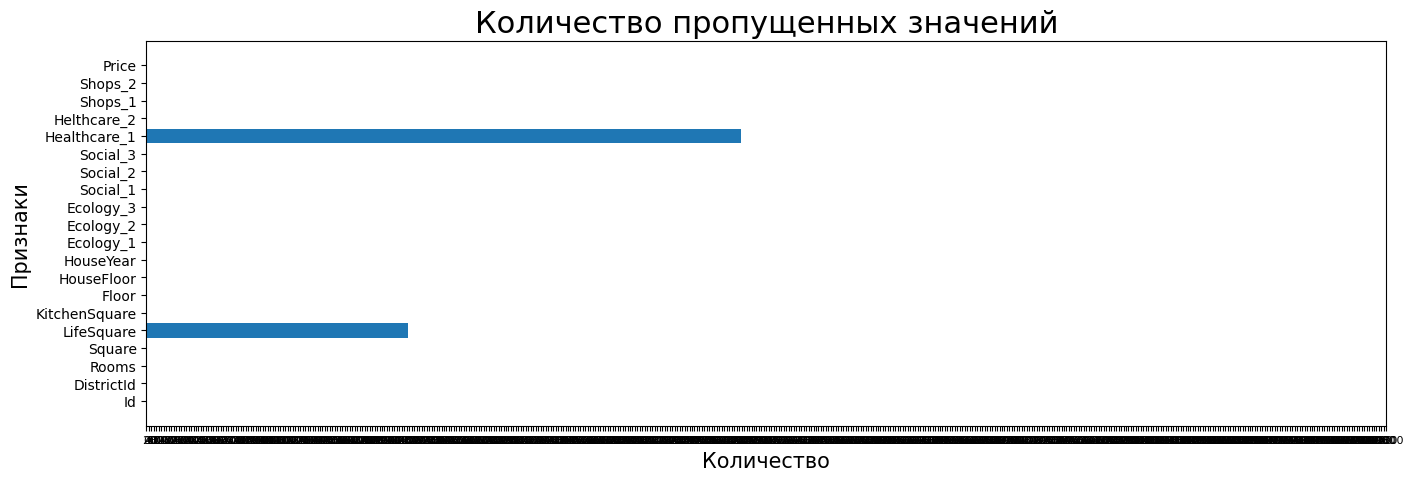

In [10]:
fig = plt.figure(figsize=(16,5))
plt.barh(df.columns,df.isna().sum().values, align='center')
plt.title("Количество пропущенных значений", fontsize=22)
plt.xlabel('Количество', fontsize=15)
plt.ylabel('Признаки', fontsize=15)
plt.xticks(np.arange(0, df.shape[0]+20, 20), fontsize=8);

В признаке Healthcare слишком много пропусков, его следует удалить

In [12]:
df=df.drop(['Healthcare_1'], axis=1)
df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,0,6,B,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,3,5,B,171842.411855


Заполним пропуски в LifeSquare медианным значением

In [16]:
df['LifeSquare']=df['LifeSquare'].fillna(df['LifeSquare'].median())

Уникальные значения

In [13]:
df.nunique()

Id               10000
DistrictId         205
Rooms                9
Square           10000
LifeSquare        7887
KitchenSquare       58
Floor               33
HouseFloor          44
HouseYear           97
Ecology_1          129
Ecology_2            2
Ecology_3            2
Social_1            51
Social_2           142
Social_3            30
Helthcare_2          7
Shops_1             16
Shops_2              2
Price            10000
dtype: int64

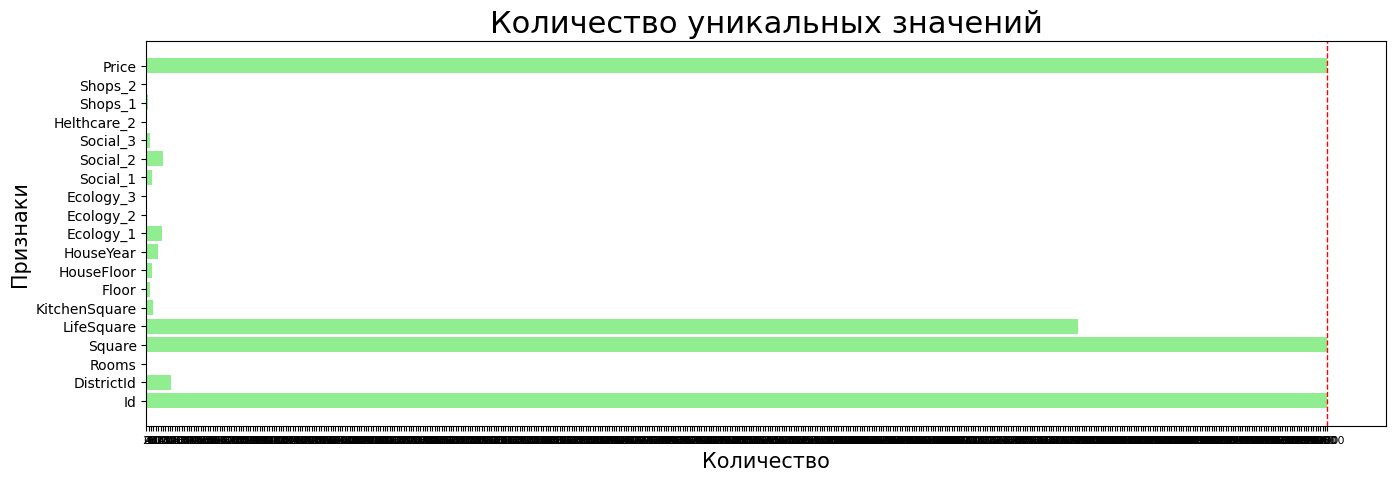

In [14]:
fig = plt.figure(figsize=(16,5))
ax=fig.subplots() 
ax.axvline(x=df.shape[0], color='r', label='Average', linestyle='--', linewidth=1)
plt.barh(df.columns,df.nunique(), align='center',color='lightgreen')
plt.title("Количество уникальных значений", fontsize=22)
plt.xlabel('Количество', fontsize=15)
plt.ylabel('Признаки', fontsize=15)
plt.xticks(np.arange(0, df.shape[0]+20, 20), fontsize=8);

В столбце id только уникальные значения, поэтому его стоит удалить. В столбцах price, square тоже уникальные значения, но такое может быть в реальности так что их не удаляем

In [18]:
df=df.drop(['Id'], axis=1)
df

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
0,27,3.0,115.027311,32.781260,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,0,0,B,305018.871089
1,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1,0,B,177734.553407
2,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,3,1,B,282078.720850
3,1,1.0,40.409907,32.781260,1.0,10,22.0,1977,0.007122,B,B,1,264,0,0,1,B,168106.007630
4,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,0,6,B,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,1,9,B,119367.455796
9996,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,0,0,A,199715.148807
9997,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,1,5,B,165953.912580
9998,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,3,5,B,171842.411855


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Ecology_2'] = le.fit_transform(df['Ecology_2'])
df['Ecology_3'] = le.fit_transform(df['Ecology_3'])
df['Shops_2'] = le.fit_transform(df['Shops_2'])
df

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
0,27,3.0,115.027311,32.781260,10.0,4,10.0,2014,0.075424,1,1,11,3097,0,0,0,1,305018.871089
1,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,1,1,30,6207,1,1,0,1,177734.553407
2,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,1,1,33,5261,0,3,1,1,282078.720850
3,1,1.0,40.409907,32.781260,1.0,10,22.0,1977,0.007122,1,1,1,264,0,0,1,1,168106.007630
4,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,1,1,33,8667,2,0,6,1,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,1,1,52,10311,6,1,9,1,119367.455796
9996,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,1,1,2,629,1,0,0,0,199715.148807
9997,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,1,1,20,4386,14,1,5,1,165953.912580
9998,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,1,1,47,8004,3,3,5,1,171842.411855


Структура целевой переменной

In [20]:
df['Ecology_1'].value_counts()

0.007122    587
0.000000    537
0.243205    511
0.072158    486
0.075779    346
           ... 
0.386772      6
0.011320      3
0.394094      2
0.012522      1
0.014334      1
Name: Ecology_1, Length: 129, dtype: int64

In [26]:
# plt.figure()
# plt.scatter(df['Square'], df['Ecology_1'])
# plt.show()

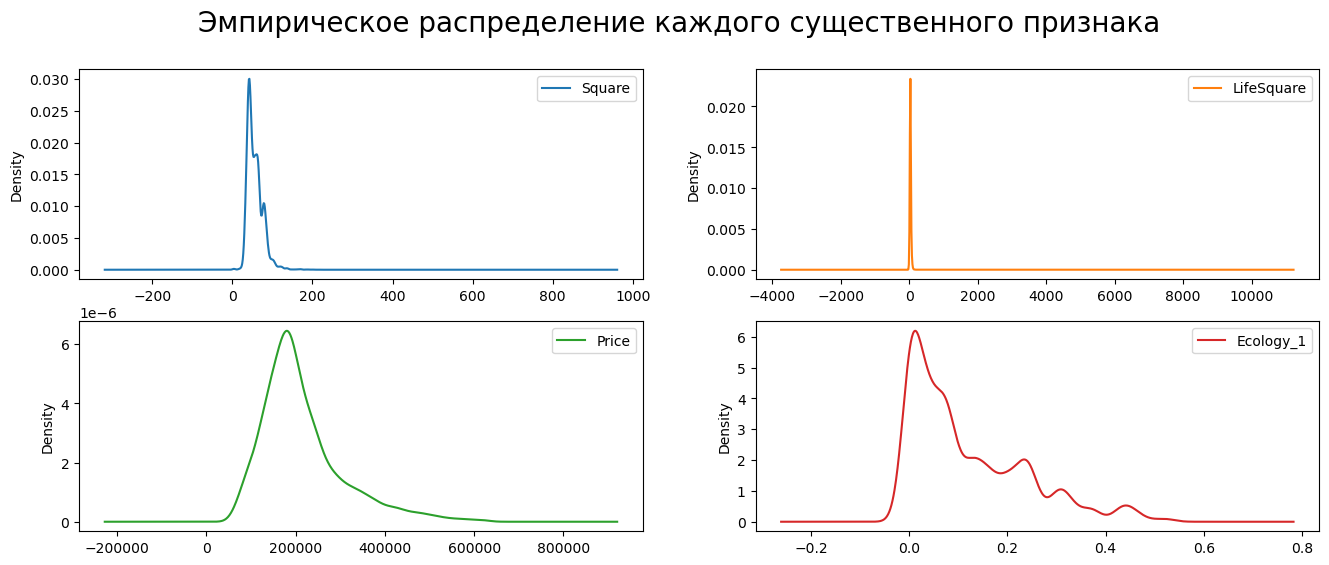

In [28]:
df[['Square','LifeSquare', 'Price', 'Ecology_1']].plot(kind='kde', subplots=True, layout=(2, 2), sharex=False, figsize=(16, 6))
plt.suptitle('Эмпирическое распределение каждого существенного признака',fontsize=20);

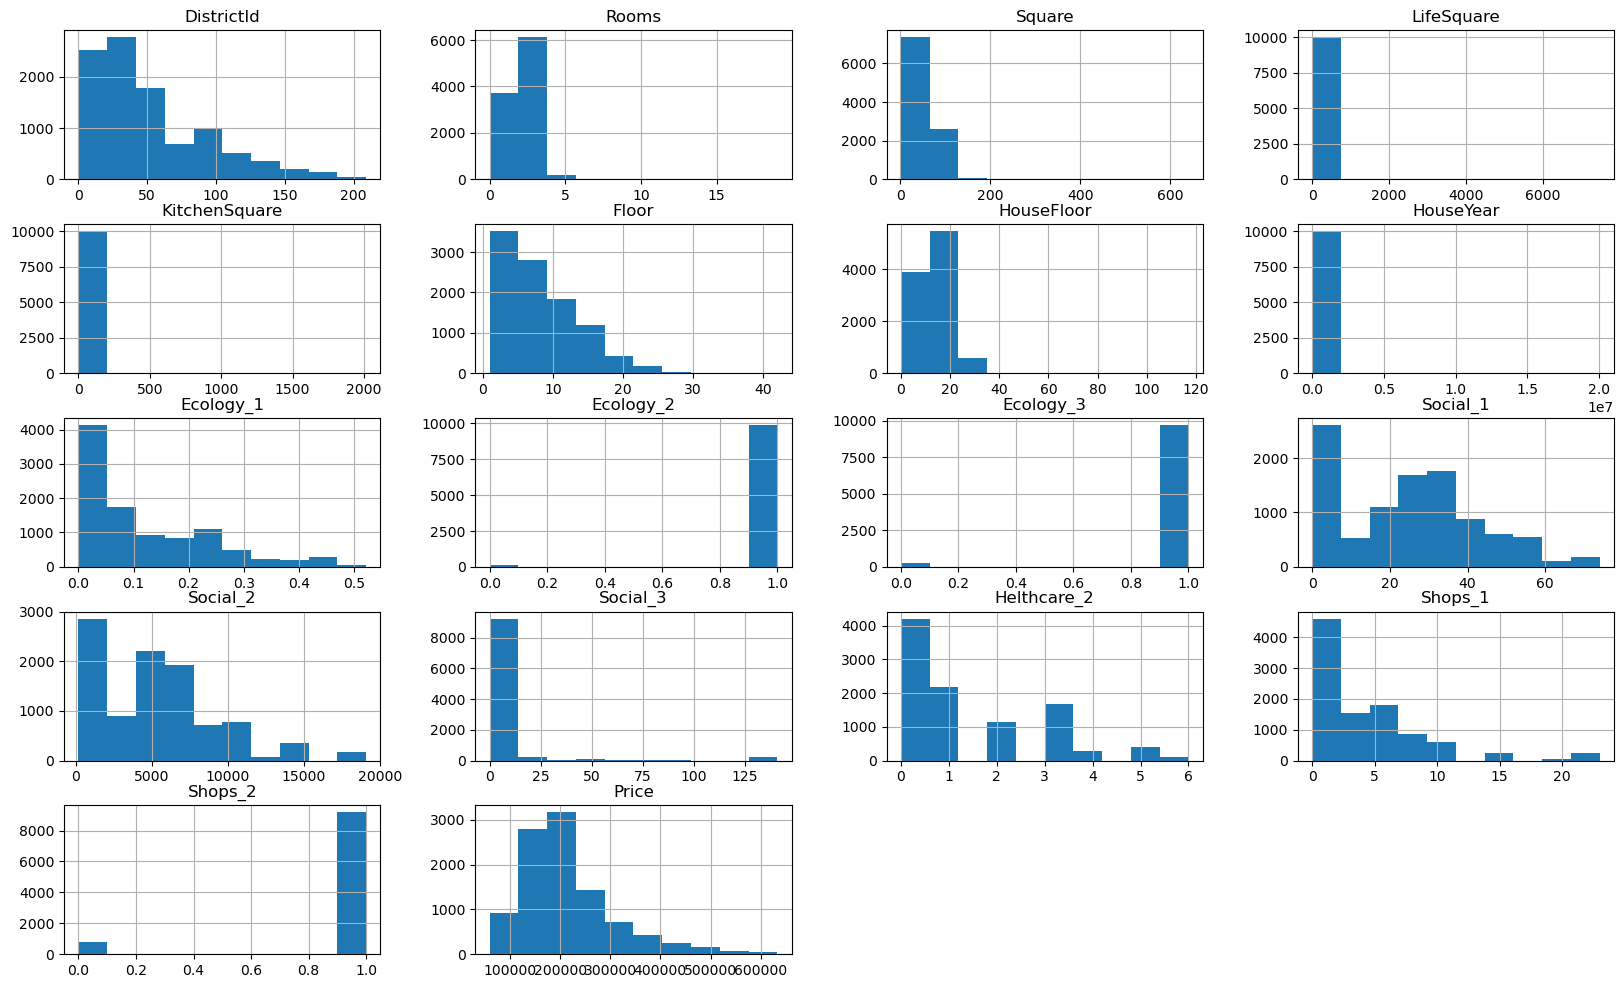

In [29]:
df[df.columns].hist(figsize=(20,12));

<AxesSubplot:>

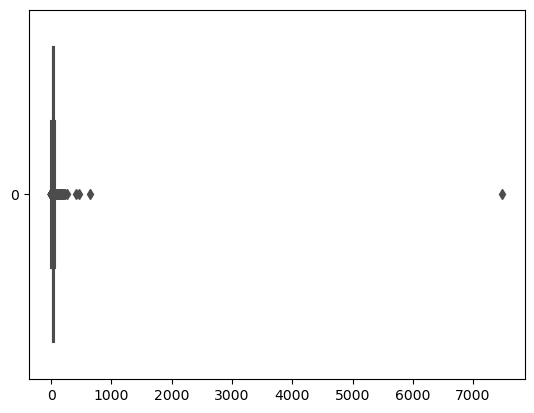

In [30]:
sns.boxplot(data=df.LifeSquare, color='yellow', orient='h')

In [31]:
def outliers_iqr(x):
    quartile_1, quartile_3 = np.percentile(x, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((x > upper_bound) | (x < lower_bound))[0], x[(x <= upper_bound) | (x >= lower_bound)].min(), x[(x <= upper_bound) | (x >= lower_bound)].max()

In [32]:
LifeSquare_outliers, min_border, max_border = outliers_iqr(df['LifeSquare'])

In [33]:
len(LifeSquare_outliers)

517